<a href="https://colab.research.google.com/github/AnastasiaSperanskaya/MachineLearningITMO/blob/main/lab7/pytorchTasksLab7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.rand(3, 4, dtype = torch.float)
print(a)

tensor([[0.2206, 0.4727, 0.6493, 0.8871],
        [0.4490, 0.2916, 0.2741, 0.4111],
        [0.2360, 0.4330, 0.3567, 0.3122]])


In [ ]:
b = torch.rand(12, dtype = torch.float)
print(b)

tensor([0.1694, 0.5607, 0.4505, 0.1058, 0.3924, 0.5561, 0.0280, 0.0730, 0.2531,
        0.7916, 0.9131, 0.2438])


In [ ]:
c = b.reshape(2, 2, 3)
print(c)

tensor([[[0.1694, 0.5607, 0.4505],
         [0.1058, 0.3924, 0.5561]],

        [[0.0280, 0.0730, 0.2531],
         [0.7916, 0.9131, 0.2438]]])


In [ ]:
print(a[:,0])

tensor([0.2206, 0.4490, 0.2360])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand(5, 2, dtype = torch.float)
print(a)

tensor([[0.5171, 0.9621],
        [0.9579, 0.8345],
        [0.1653, 0.8881],
        [0.8969, 0.1055],
        [0.5918, 0.6415]])


In [ ]:
b = torch.rand(1, 10, dtype = torch.float)
print(b)

tensor([[0.4580, 0.2646, 0.1691, 0.0509, 0.4509, 0.8364, 0.0341, 0.5198, 0.1325,
         0.8009]])


In [ ]:
c = b.reshape(5, 2)
print(c)

tensor([[0.4580, 0.2646],
        [0.1691, 0.0509],
        [0.4509, 0.8364],
        [0.0341, 0.5198],
        [0.1325, 0.8009]])


In [ ]:
print(a.add(c))
print(a.sub(c))
print(a.mul(c))
print(a.div(c))

tensor([[0.9751, 1.2267],
        [1.1271, 0.8854],
        [0.6161, 1.7244],
        [0.9310, 0.6252],
        [0.7244, 1.4424]])
tensor([[ 0.0592,  0.6975],
        [ 0.7888,  0.7837],
        [-0.2856,  0.0517],
        [ 0.8628, -0.4143],
        [ 0.4593, -0.1594]])
tensor([[0.2368, 0.2546],
        [0.1620, 0.0424],
        [0.0745, 0.7428],
        [0.0306, 0.0548],
        [0.0784, 0.5138]])
tensor([[ 1.1292,  3.6356],
        [ 5.6632, 16.4097],
        [ 0.3666,  1.0618],
        [26.2852,  0.2030],
        [ 4.4656,  0.8009]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

In [ ]:
for i in range(0, 100):
  images[i][i * 2 : i * 2 + 2] = 255

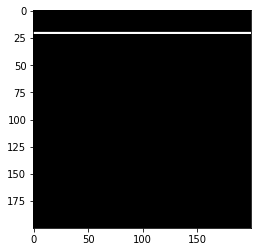

In [ ]:
plt.imshow(images[10])

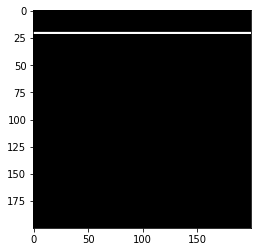

In [ ]:
plt.imshow(images[10])

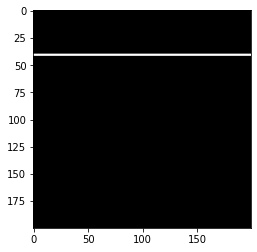

In [ ]:
plt.imshow(images[20])

In [ ]:
average = (torch.mean(images.float(), dim=0) * 70).int()

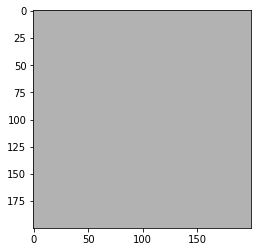

In [ ]:
plt.imshow(average)

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.FloatTensor(2, 3, 4).uniform_()
a = a.cuda()
print(a.is_cuda)
print(a)

True
tensor([[[0.0350, 0.6294, 0.1149, 0.9949],
         [0.0837, 0.0153, 0.6358, 0.6185],
         [0.2736, 0.8473, 0.0404, 0.3398]],

        [[0.2214, 0.4852, 0.7788, 0.4626],
         [0.0595, 0.7234, 0.1635, 0.0571],
         [0.0752, 0.6242, 0.2231, 0.5959]]], device='cuda:0')


In [ ]:
b = torch.FloatTensor(1, 8, 3).uniform_()
b = b.cuda()
print(b.is_cuda)
print(b)

True
tensor([[[9.1760e-01, 9.2789e-01, 3.0925e-01],
         [7.6197e-01, 1.6489e-01, 5.7776e-01],
         [1.0478e-01, 5.7445e-02, 4.3515e-01],
         [3.0400e-01, 6.8107e-01, 8.7414e-01],
         [5.3269e-01, 4.5428e-01, 9.9401e-01],
         [8.1183e-01, 2.1844e-01, 8.3067e-01],
         [5.3254e-01, 1.3795e-01, 1.2970e-04],
         [1.9997e-01, 5.7794e-02, 2.6934e-01]]], device='cuda:0')


In [ ]:
c = b.reshape(2, 3, 4)
print(c)

tensor([[[9.1760e-01, 9.2789e-01, 3.0925e-01, 7.6197e-01],
         [1.6489e-01, 5.7776e-01, 1.0478e-01, 5.7445e-02],
         [4.3515e-01, 3.0400e-01, 6.8107e-01, 8.7414e-01]],

        [[5.3269e-01, 4.5428e-01, 9.9401e-01, 8.1183e-01],
         [2.1844e-01, 8.3067e-01, 5.3254e-01, 1.3795e-01],
         [1.2970e-04, 1.9997e-01, 5.7794e-02, 2.6934e-01]]], device='cuda:0')


In [ ]:
a = a.cpu()
print(a.is_cuda)

False


In [ ]:
c = c.cpu()
print(c.is_cuda)

False


In [ ]:
from torch.autograd import Variable
a = Variable(a, requires_grad=False)
c = Variable(c, requires_grad=True)

In [ ]:
L = torch.mean((c - a) ** 2)

In [ ]:
L.backward()

In [ ]:
c.grad

tensor([[[ 0.0735,  0.0249,  0.0162, -0.0194],
         [ 0.0068,  0.0469, -0.0442, -0.0468],
         [ 0.0135, -0.0453,  0.0534,  0.0445]],

        [[ 0.0259, -0.0026,  0.0179,  0.0291],
         [ 0.0132,  0.0089,  0.0308,  0.0067],
         [-0.0063, -0.0353, -0.0138, -0.0272]]])